In [3]:
# Install required libraries
!pip install pandas matplotlib seaborn wordcloud faiss-cpu gradio sentence-transformers transformers datasets scikit-learn torch



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [6]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Final Data.csv'  # Update to your file path
data = pd.read_csv(file_path)




In [5]:
# Handle missing values
data.fillna('', inplace=True)

# Combine relevant columns into a "corpus" column
columns_to_combine = ['Hotel', 'Address', 'Review_Date', 'Average_Score', 'Positive_Review', 'Negative_Review']
data['corpus'] = data[columns_to_combine].astype(str).agg(' '.join, axis=1)

# Display a sample of the data
print(data.head())

   S.No District Division Sub-Division  Police Station  \
0     1   Astore   Astore       Astore  PS City Astore   
1     2   Astore   Astore       Astore  PS City Astore   
2     3   Astore   Astore       Astore  PS City Astore   
3     4   Astore   Astore       Astore  PS City Astore   
4     5   Astore   Astore       Astore  PS City Astore   

                               Hotel  Longitude  Latitude   Manager Name  \
0  Wazeer's Mahel Hotel & Restaurant       74.5      35.5    Raees Nasir   
1  Taimoor Mir Hotel and Restaurant        74.5      35.5    Qudoos Mir    
2              Rama Green View Hotel       74.5      35.5   Iftikhar Ali   
3          Mir Hotel and Restaurant        74.5      35.5   Najeeb Ullah   
4                Royal Resort Astore       74.5      35.5  Muhammad Raza   

                  Address  ...  \
0        Gorikote Astore   ...   
1         Patipura Astore  ...   
2  Rama Road Astore  Rama  ...   
3           City  Astore   ...   
4           Eidgha Astor

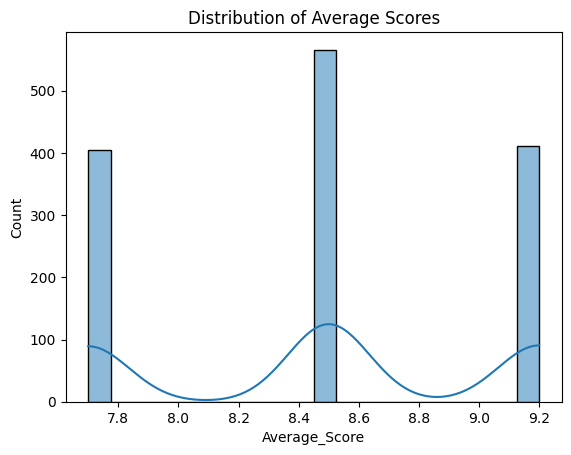

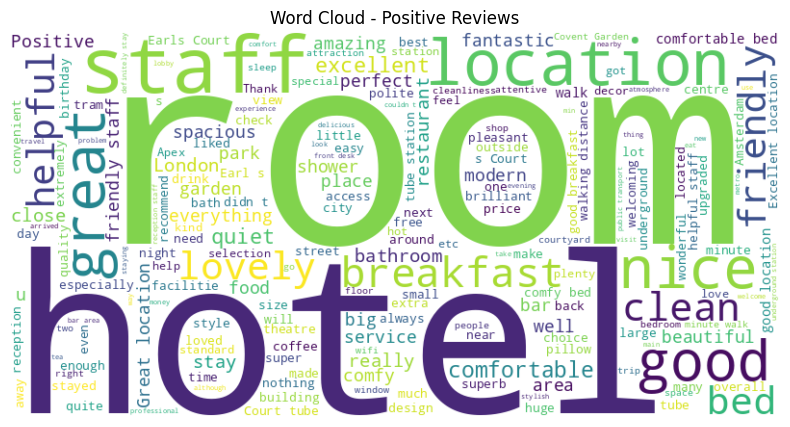

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Distribution of Average Scores
sns.histplot(data['Average_Score'], kde=True, bins=20)
plt.title("Distribution of Average Scores")
plt.show()

# Word Cloud for Positive Reviews
positive_reviews = ' '.join(data['Positive_Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Positive Reviews")
plt.show()


In [7]:
from sentence_transformers import SentenceTransformer

# Initialize the Sentence Transformer model
model_name = 'all-mpnet-base-v2'  # Open-source model suitable for sentence embedding
model = SentenceTransformer(model_name)

# Generate embeddings for the "corpus"
corpus_embeddings = model.encode(data['corpus'].tolist(), show_progress_bar=True)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/44 [00:00<?, ?it/s]

In [8]:
import faiss
import numpy as np

# Create a FAISS index
dimension = corpus_embeddings.shape[1]
faiss_index = faiss.IndexFlatL2(dimension)
faiss_index.add(np.array(corpus_embeddings))

print(f"FAISS Index created with {faiss_index.ntotal} entries.")


FAISS Index created with 1382 entries.


In [9]:
def recommend_hotels(query, top_k=5):
    query_embedding = model.encode([query])
    distances, indices = faiss_index.search(query_embedding, k=top_k)
    recommendations = data.iloc[indices[0]][['Hotel', 'Address', 'Average_Score']]
    return recommendations


In [10]:
from sklearn.metrics.pairwise import cosine_similarity

# Example evaluation function
def evaluate_recommendation_system():
    # Use a sample query for evaluation
    sample_query = "Affordable hotels with great service"
    query_embedding = model.encode([sample_query])

    # Get recommendations
    distances, indices = faiss_index.search(query_embedding, k=5)
    recommended_corpus = data.iloc[indices[0]]['corpus'].tolist()

    # Calculate cosine similarity between query and recommendations
    similarities = cosine_similarity(query_embedding, model.encode(recommended_corpus))
    avg_similarity = np.mean(similarities)

    print(f"Average Cosine Similarity: {avg_similarity:.4f}")
    return avg_similarity

# Run the evaluation
evaluate_recommendation_system()


Average Cosine Similarity: 0.5884


0.58843994

In [11]:
import gradio as gr

def chatbot_response(user_input):
    recommendations = recommend_hotels(user_input)
    return recommendations.to_string(index=False)

# Build Gradio Interface
interface = gr.Interface(
    fn=chatbot_response,
    inputs="text",
    outputs="text",
    title="Hotel Recommendation System",
    description="Ask me about hotels in Gilgit Baltistan!",
)

# Launch the Gradio app
interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4daffeb40d1f5fd3ed.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import joblib

# Save the FAISS index and Sentence Transformer model
faiss.write_index(faiss_index, '/content/drive/MyDrive/faiss_index.bin')
joblib.dump(model, '/content/drive/MyDrive/sentence_transformer_model.pkl')


In [ ]:
# Write Streamlit app to a file
with open("app.py", "w") as f:
    f.write('''
import streamlit as st
import pandas as pd
import faiss
from sentence_transformers import SentenceTransformer

# Load model and index
faiss_index = faiss.read_index("faiss_index.bin")
model = joblib.load("sentence_transformer_model.pkl")
data = pd.read_csv("Final Data.csv")

st.title("Hotel Recommendation System")
query = st.text_input("Enter your query:")

if query:
    query_embedding = model.encode([query])
    distances, indices = faiss_index.search(query_embedding, k=5)
    recommendations = data.iloc[indices[0]][['Hotel', 'Address', 'Average_Score']]
    st.write(recommendations)
    ''')

# Run Streamlit app
!streamlit run app.py


# costum model code

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [24]:
# Load the dataset
file_path = '/content/drive/MyDrive/Final Data.csv'  # Update to your file path
data = pd.read_csv(file_path)


In [25]:
# Handle missing values
data.fillna('', inplace=True)


In [26]:
# Combine relevant columns into a "corpus" column
columns_to_combine = ['Hotel', 'Address', 'Review_Date', 'Average_Score', 'Positive_Review', 'Negative_Review']
data['corpus'] = data[columns_to_combine].astype(str).agg(' '.join, axis=1)


In [27]:
# Encode Average Score into categories for classification
def categorize_score(score):
    if score >= 8:
        return 'High'
    elif 5 <= score < 8:
        return 'Medium'
    else:
        return 'Low'

data['score_category'] = data['Average_Score'].apply(categorize_score)


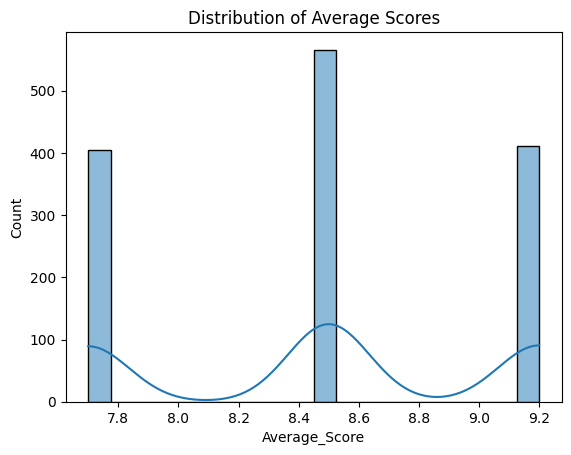

In [28]:
# Visualizations
sns.histplot(data['Average_Score'], kde=True, bins=20)
plt.title("Distribution of Average Scores")
plt.show()



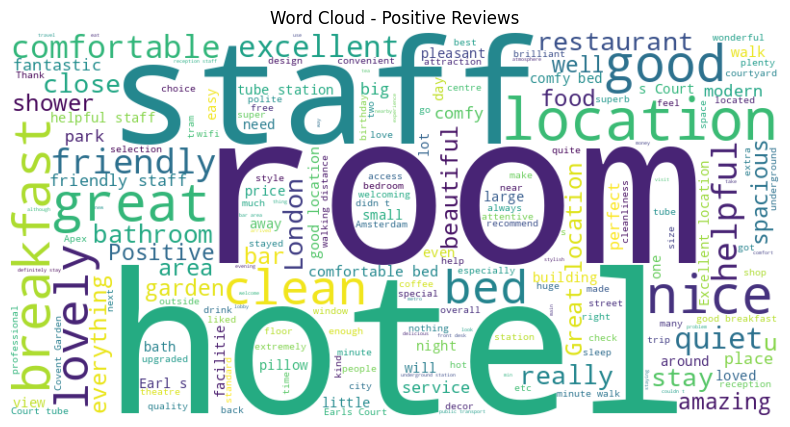

In [29]:
positive_reviews = ' '.join(data['Positive_Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Positive Reviews")
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from datasets import Dataset
import torch

In [31]:
# Split the data into training and testing sets
texts = data['corpus'].tolist()
labels = data['score_category'].map({'Low': 0, 'Medium': 1, 'High': 2}).tolist()

train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)


In [32]:
# Tokenizer and model
model_name = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [33]:
# Prepare the dataset
def tokenize_data(texts, labels):
    encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
    return {
        'input_ids': encodings['input_ids'],
        'attention_mask': encodings['attention_mask'],
        'labels': labels
    }

train_encodings = tokenize_data(train_texts, train_labels)
test_encodings = tokenize_data(test_texts, test_labels)


In [34]:
# Convert to PyTorch Dataset
class HotelDataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __len__(self):
        return len(self.encodings['input_ids'])

    def __getitem__(self, idx):
        return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}

train_dataset = HotelDataset(train_encodings)
test_dataset = HotelDataset(test_encodings)


In [36]:
# Training arguments
training_args = TrainingArguments(
    output_dir='/content/drive/MyDrive/NLPMODEL/hotel_model',
    num_train_epochs=5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='/content/drive/MyDrive/NLPMODEL/logs',
    save_total_limit=2
)


In [37]:
# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer
)

trainer.train()

<ipython-input-37-ccd33622067c>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Step,Training Loss


TrainOutput(global_step=350, training_loss=0.25716142926897323, metrics={'train_runtime': 377.7441, 'train_samples_per_second': 14.626, 'train_steps_per_second': 0.927, 'total_flos': 636120051167250.0, 'train_loss': 0.25716142926897323, 'epoch': 5.0})

In [38]:
trainer.save_model('/content/drive/MyDrive/NLPMODEL/fine_tuned_hotel_model')
tokenizer.save_pretrained('/content/drive/MyDrive/NLPMODEL/fine_tuned_hotel_model')


('/content/drive/MyDrive/NLPMODEL/fine_tuned_hotel_model/tokenizer_config.json',
 '/content/drive/MyDrive/NLPMODEL/fine_tuned_hotel_model/special_tokens_map.json',
 '/content/drive/MyDrive/NLPMODEL/fine_tuned_hotel_model/vocab.txt',
 '/content/drive/MyDrive/NLPMODEL/fine_tuned_hotel_model/added_tokens.json',
 '/content/drive/MyDrive/NLPMODEL/fine_tuned_hotel_model/tokenizer.json')

In [40]:
from sklearn.metrics import classification_report, mean_squared_error

# Predictions
predictions = trainer.predict(test_dataset)
predicted_labels = torch.argmax(torch.tensor(predictions.predictions), axis=1).numpy()

# Get unique predicted labels
unique_predicted_labels = np.unique(predicted_labels)

# Adjust target_names based on predicted labels
target_names = [
    'Low', 'Medium', 'High'  # Original target names
]
# Select target names corresponding to unique predicted labels
target_names = [target_names[label] for label in unique_predicted_labels]


# Evaluation Metrics
print("Classification Report:")
print(classification_report(test_labels, predicted_labels, target_names=target_names, labels=unique_predicted_labels))

mse = mean_squared_error(test_labels, predicted_labels)
print(f"Mean Squared Error: {mse}")

Classification Report:
              precision    recall  f1-score   support

      Medium       1.00      1.00      1.00        79
        High       1.00      1.00      1.00       198

    accuracy                           1.00       277
   macro avg       1.00      1.00      1.00       277
weighted avg       1.00      1.00      1.00       277

Mean Squared Error: 0.0


In [3]:
pip uninstall -y tensorflow


Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Successfully uninstalled tensorflow-2.15.0


In [4]:
pip install tensorflow-cpu


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.0/230.0 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.3/381.3 kB 22.2 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0


In [5]:
import faiss
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from transformers import AutoTokenizer, AutoModel
import pandas as pd
import torch
import gradio as gr

In [6]:
# Load your saved model and tokenizer
model_path = '/content/drive/MyDrive/NLPMODEL/fine_tuned_hotel_model'
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModel.from_pretrained(model_path)

In [7]:
# Function to encode text using the custom model
def encode_texts(texts):
    inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
        embeddings = outputs.last_hidden_state[:, 0, :].numpy()  # CLS token representation
    return embeddings

In [8]:
# Load your dataset
file_path = '/content/drive/MyDrive/Final Data.csv'  # Update file path
data = pd.read_csv(file_path)


In [9]:
# Handle missing values and create corpus
data.fillna('', inplace=True)
columns_to_combine = ['Hotel', 'Address', 'Review_Date', 'Average_Score', 'Positive_Review', 'Negative_Review']
data['corpus'] = data[columns_to_combine].astype(str).agg(' '.join, axis=1)


In [10]:
# Encode corpus using the custom model
print("Encoding corpus...")
corpus_embeddings = encode_texts(data['corpus'].tolist())


Encoding corpus...


In [11]:
# Create FAISS index
dimension = corpus_embeddings.shape[1]
faiss_index = faiss.IndexFlatL2(dimension)
faiss_index.add(np.array(corpus_embeddings))
print(f"FAISS Index created with {faiss_index.ntotal} entries.")


FAISS Index created with 1382 entries.


In [12]:
# Recommendation function
def recommend_hotels(query, top_k=5):
    query_embedding = encode_texts([query])
    distances, indices = faiss_index.search(query_embedding, k=top_k)
    recommendations = data.iloc[indices[0]][['Hotel', 'Address', 'Average_Score']]
    return recommendations

In [13]:
# Example evaluation function
def evaluate_recommendation_system():
    # Use a sample query for evaluation
    sample_query = "Affordable hotels with great service"
    query_embedding = encode_texts([sample_query])

    # Get recommendations
    distances, indices = faiss_index.search(query_embedding, k=5)
    recommended_corpus = data.iloc[indices[0]]['corpus'].tolist()

    # Calculate cosine similarity between query and recommendations
    similarities = cosine_similarity(query_embedding, encode_texts(recommended_corpus))
    avg_similarity = np.mean(similarities)

    print(f"Average Cosine Similarity: {avg_similarity:.4f}")
    return avg_similarity

In [14]:
# Run the evaluation
evaluate_recommendation_system()


Average Cosine Similarity: 0.6879


0.6878701

In [15]:
# Gradio-based chatbot
def chatbot_response(user_input):
    recommendations = recommend_hotels(user_input)
    return recommendations.to_string(index=False)


In [16]:
# Build Gradio Interface
interface = gr.Interface(
    fn=chatbot_response,
    inputs="text",
    outputs="text",
    title="Hotel Recommendation System",
    description="Ask me about hotels in Gilgit Baltistan!",
)

In [17]:
# Launch the Gradio app
interface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e175a0d4d9f2bcffc6.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
